In [1]:
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
ssh_it = xr.open_dataset("/bettik/bellemva/MITgcm/MITgcm_it/by_mode/MITgcm_it_20120601.nc").load()
ssh_it

<xarray.Dataset>
Dimensions:    (latitude: 961, longitude: 961, time: 24)
Coordinates:
  * latitude   (latitude) float32 15.0 15.02 15.04 15.06 ... 34.96 34.98 35.0
  * longitude  (longitude) float32 185.0 185.0 185.0 185.1 ... 205.0 205.0 205.0
  * time       (time) datetime64[ns] 2012-06-01 ... 2012-06-01T23:00:00
Data variables:
    ssh_it1    (time, latitude, longitude) float64 -0.006127 ... -0.02253
    ssh_it2    (time, latitude, longitude) float64 0.01727 0.01697 ... 0.001092
    ssh_it3    (time, latitude, longitude) float64 0.005253 ... -0.0003056

In [21]:
bathy = xr.open_dataset("/bettik/bellemva/sad/Bathymetry_hawai.nc").elevation
bathy["lon"] = bathy["lon"]+360
bathy = bathy.interp({"lon" : ssh_it.longitude.values, "lat" : ssh_it.latitude.values},method='nearest',kwargs={"fill_value": "extrapolate"})
bathy = bathy.load()
bathy = bathy.rename({'lon': 'longitude','lat': 'latitude'})

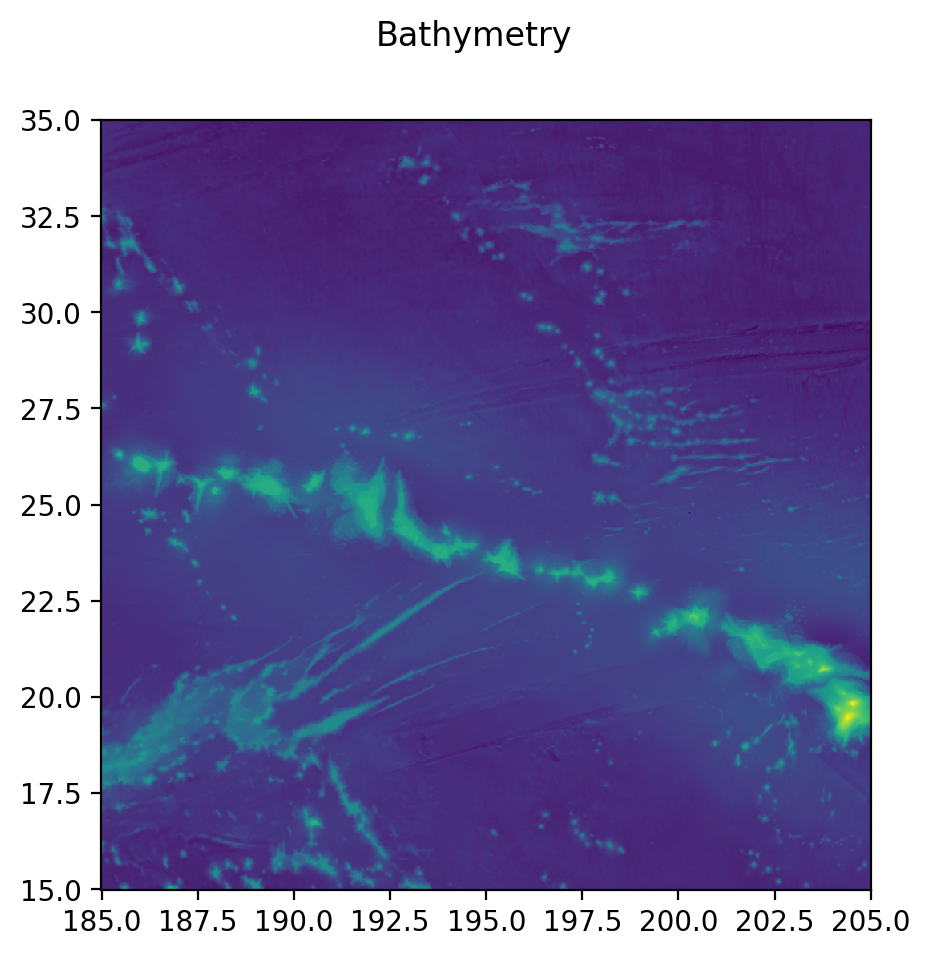

In [19]:
fig,ax = plt.subplots(1,1,figsize=(5,5),dpi=200)
plt.pcolormesh(bathy.longitude.values, bathy.latitude.values, bathy.elevation.values)
ax.set_aspect("equal")
fig.suptitle("Bathymetry")
plt.show()

In [23]:
y_grad, x_grad = np.gradient(bathy.values)

In [26]:
norm_grad = np.sqrt(x_grad**2+y_grad**2)

(array([7.8941e+05, 6.7166e+04, 3.3653e+04, 1.9411e+04, 9.7390e+03,
        3.3950e+03, 6.5300e+02, 7.8000e+01, 1.1000e+01, 5.0000e+00]),
 array([   0.        ,  143.92700407,  287.85400814,  431.7810122 ,
         575.70801627,  719.63502034,  863.56202441, 1007.48902848,
        1151.41603254, 1295.34303661, 1439.27004068]),
 <BarContainer object of 10 artists>)

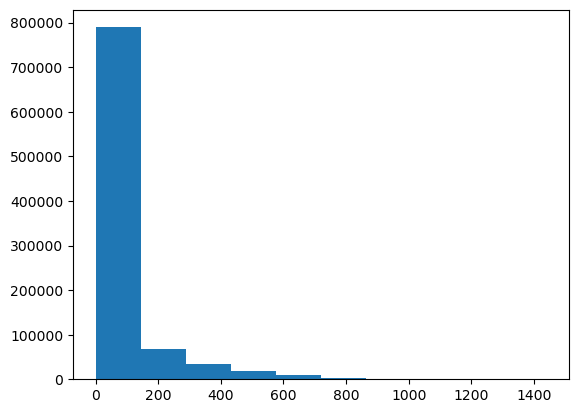

In [29]:
plt.hist(norm_grad.flatten())

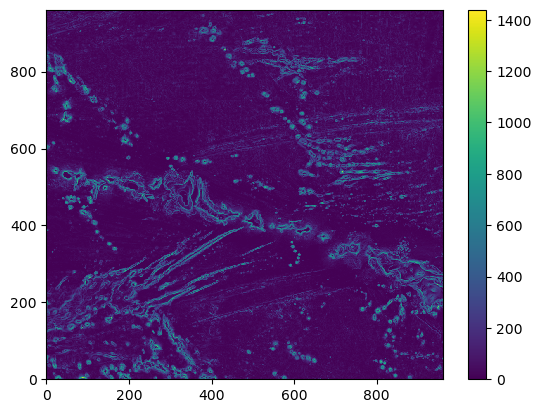

In [36]:
#plt.pcolormesh(norm_grad,vmin=200,vmax=800,cmap="viridis")
plt.pcolormesh(norm_grad)
plt.colorbar()

In [22]:
bathy

<xarray.DataArray 'elevation' (latitude: 961, longitude: 961)>
array([[-5694., -5666., -5659., ..., -5530., -5548., -5531.],
       [-5668., -5633., -5658., ..., -5545., -5555., -5519.],
       [-5670., -5646., -5608., ..., -5543., -5561., -5574.],
       ...,
       [-5512., -5502., -5530., ..., -5725., -5781., -5770.],
       [-5491., -5500., -5456., ..., -5760., -5835., -5795.],
       [-5537., -5575., -5397., ..., -5796., -5838., -5778.]])
Coordinates:
  * longitude  (longitude) float32 185.0 185.0 185.0 185.1 ... 205.0 205.0 205.0
  * latitude   (latitude) float32 15.0 15.02 15.04 15.06 ... 34.96 34.98 35.0
Attributes:
    standard_name:       height_above_mean_sea_level
    long_name:           Elevation relative to sea level
    units:               m
    grid_mapping:        crs
    sdn_parameter_urn:   SDN:P01::ALATZZ01
    sdn_parameter_name:  Sea floor height (above mean sea level) {bathymetric...
    sdn_uom_urn:         SDN:P06::ULAA
    sdn_uom_name:        Metres

In [20]:
np.gradient(bathy.elevation.values)

[array([[ 26. ,  33. ,   1. , ..., -15. ,  -7. ,  12. ],
        [ 12. ,  10. ,  25.5, ...,  -6.5,  -6.5, -21.5],
        [ 49.5,  39. ,  56. , ...,   3.5,  -6.5, -27.5],
        ...,
        [-23. , -28. , -10. , ..., -17.5, -39. , -16.5],
        [-12.5, -36.5,  66.5, ..., -35.5, -28.5,  -4. ],
        [-46. , -75. ,  59. , ..., -36. ,  -3. ,  17. ]]),
 array([[  28. ,   17.5,    1. , ...,  -34.5,   -0.5,   17. ],
        [  35. ,    5. ,  -16. , ...,  -25. ,   13. ,   36. ],
        [  24. ,   31. ,   20.5, ...,  -35. ,  -15.5,  -13. ],
        ...,
        [  10. ,   -9. ,  -14.5, ...,  -74. ,  -22.5,   11. ],
        [  -9. ,   17.5,   16.5, ..., -122.5,  -17.5,   40. ],
        [ -38. ,   70. ,  130.5, ..., -124.5,    9. ,   60. ]])]